In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Exploring dataset
sg = pd.read_csv("C:\\Users\\VAIO\\OneDrive\\Desktop\\MLP Assignment\\bank_cleaned.csv")

In [3]:
sg.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary
0,0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,no,0
1,1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,no,0
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,no,0
3,5,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,no,0
4,6,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,no,0


In [4]:
sg.tail()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary
40836,45205,25,technician,single,secondary,no,505,no,yes,17,nov,6.43,2,-1,0,unknown,yes,1
40837,45206,51,technician,married,tertiary,no,825,no,no,17,nov,16.28,3,-1,0,unknown,yes,1
40838,45207,71,retired,divorced,primary,no,1729,no,no,17,nov,7.60,2,-1,0,unknown,yes,1
40839,45208,72,retired,married,secondary,no,5715,no,no,17,nov,18.78,5,184,3,success,yes,1
40840,45209,57,blue-collar,married,secondary,no,668,no,no,17,nov,8.47,4,-1,0,unknown,no,0


In [5]:
sg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40841 entries, 0 to 40840
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       40841 non-null  int64  
 1   age              40841 non-null  int64  
 2   job              40841 non-null  object 
 3   marital          40841 non-null  object 
 4   education        40841 non-null  object 
 5   default          40841 non-null  object 
 6   balance          40841 non-null  int64  
 7   housing          40841 non-null  object 
 8   loan             40841 non-null  object 
 9   day              40841 non-null  int64  
 10  month            40841 non-null  object 
 11  duration         40841 non-null  float64
 12  campaign         40841 non-null  int64  
 13  pdays            40841 non-null  int64  
 14  previous         40841 non-null  int64  
 15  poutcome         40841 non-null  object 
 16  response         40841 non-null  object 
 17  response_bin

In [6]:
sg.isnull().sum()

Unnamed: 0         0
age                0
job                0
marital            0
education          0
default            0
balance            0
housing            0
loan               0
day                0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome           0
response           0
response_binary    0
dtype: int64

In [7]:
sg.describe()

,Unnamed: 0,age,balance,day,duration,campaign,pdays,previous,response_binary
count,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000
mean,22006.477657,40.790676,1073.981807,15.863666,4.308949,2.774149,32.248304,0.436791,0.113587
std,12919.797651,10.475473,1712.556186,8.313608,4.305823,3.104177,90.738402,1.572342,0.317313
min,0.000000,18.000000,-6847.000000,1.000000,0.100000,1.000000,-1.000000,0.000000,0.000000
25%,10888.000000,33.000000,64.000000,8.000000,1.730000,1.000000,-1.000000,0.000000,0.000000
50%,21652.000000,39.000000,421.000000,16.000000,3.000000,2.000000,-1.000000,0.000000,0.000000
75%,33102.000000,48.000000,1333.000000,21.000000,5.300000,3.000000,-1.000000,0.000000,0.000000
max,45209.000000,95.000000,10443.000000,31.000000,81.970000,58.000000,871.000000,55.000000,1.000000


In [8]:
sg.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary
0,0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,no,0
1,1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,no,0
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,no,0
3,5,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,no,0
4,6,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,no,0


In [9]:
sg.columns

Index(['Unnamed: 0', 'age', 'job', 'marital', 'education', 'default',
       'balance', 'housing', 'loan', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'response', 'response_binary'],
      dtype='object')

In [10]:
sg.response.unique()

array(['no', 'yes'], dtype=object)

In [11]:
num_atr=['age' , 'balance' , 'day' , 'duration' , 'campaign' , 'pdays' , 'previous']

cat_atr=['job' , 'marital' , 'education' , 'default' , 'housing' , 'loan' , 'poutcome' , 'month']

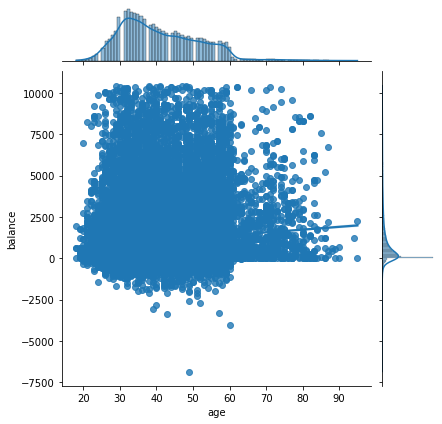

In [12]:
sns.jointplot(x='age',y='balance', data=sg,kind='reg')

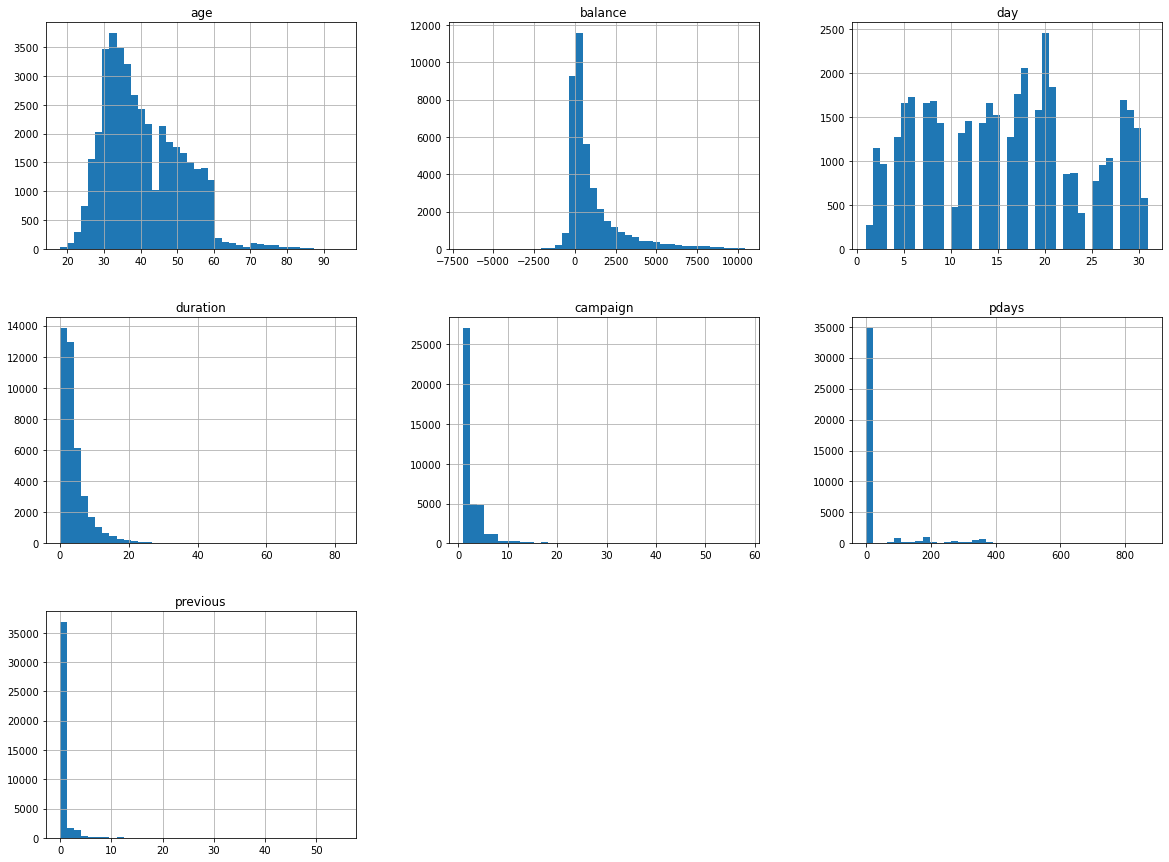

In [13]:
sg[num_atr].hist(bins=40, figsize=(20,15)) 
plt.show()

In [14]:
sg.isna().sum()

Unnamed: 0         0
age                0
job                0
marital            0
education          0
default            0
balance            0
housing            0
loan               0
day                0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome           0
response           0
response_binary    0
dtype: int64

In [15]:
sg[sg.duplicated(keep = 'last')] 

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary


In [16]:
sg.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary
0,0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,no,0
1,1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,no,0
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,no,0
3,5,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,no,0
4,6,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,no,0


In [17]:
from sklearn.model_selection import train_test_split
X= sg.drop(['response','response_binary'], axis=1)
y= sg['response_binary']


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [18]:
atr=X_train.select_dtypes('number').columns

In [19]:
atr

Index(['Unnamed: 0', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous'],
      dtype='object')

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score 
from sklearn.preprocessing import OneHotEncoder as onehot

In [21]:
from sklearn.preprocessing import LabelEncoder

In [24]:
la = LabelEncoder()
X_train[cat_atr] = X_train[cat_atr].apply(la.fit_transform)

C:\Users\VAIO\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [25]:
X_train[cat_atr].head()

,job,marital,education,default,housing,loan,poutcome,month
18219,6,1,1,0,0,0,2,1
35260,0,2,2,0,1,0,2,8
32775,0,2,1,0,1,0,0,8
19125,10,1,1,1,1,0,2,1
8771,1,1,0,0,0,0,2,6


In [26]:
sg.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary
0,0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,no,0
1,1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,no,0
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,no,0
3,5,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,no,0
4,6,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,no,0


In [27]:
sg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40841 entries, 0 to 40840
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       40841 non-null  int64  
 1   age              40841 non-null  int64  
 2   job              40841 non-null  object 
 3   marital          40841 non-null  object 
 4   education        40841 non-null  object 
 5   default          40841 non-null  object 
 6   balance          40841 non-null  int64  
 7   housing          40841 non-null  object 
 8   loan             40841 non-null  object 
 9   day              40841 non-null  int64  
 10  month            40841 non-null  object 
 11  duration         40841 non-null  float64
 12  campaign         40841 non-null  int64  
 13  pdays            40841 non-null  int64  
 14  previous         40841 non-null  int64  
 15  poutcome         40841 non-null  object 
 16  response         40841 non-null  object 
 17  response_bin

In [28]:
ss = StandardScaler()
ss.fit_transform(X_train[num_atr])

array([[ 1.73001627, -0.47464014, -1.19330489, ..., -0.25168668,
        -0.36609229, -0.27781277],
       [-1.31502806, -0.54444812, -0.11086422, ..., -0.57275847,
        -0.36609229, -0.27781277],
       [-0.83923988, -0.26169648, -1.07303371, ..., -0.25168668,
         3.53019841,  0.35022072],
       ...,
       [ 0.87359755,  1.54275173,  0.00940697, ...,  0.71152869,
        -0.36609229, -0.27781277],
       [-0.3634517 , -0.56146015, -1.07303371, ..., -0.57275847,
        -0.36609229, -0.27781277],
       [ 1.15907046,  0.69273695,  0.97157645, ..., -0.57275847,
        -0.36609229, -0.27781277]])

In [29]:
a = X_train[cat_atr]
b = ss.transform(X_train[num_atr])

Xtr = np.hstack([a,b])
Xtr.shape 

(28588, 15)

In [30]:
Xtr

array([[ 6.        ,  1.        ,  1.        , ..., -0.25168668,
        -0.36609229, -0.27781277],
       [ 0.        ,  2.        ,  2.        , ..., -0.57275847,
        -0.36609229, -0.27781277],
       [ 0.        ,  2.        ,  1.        , ..., -0.25168668,
         3.53019841,  0.35022072],
       ...,
       [ 0.        ,  2.        ,  1.        , ...,  0.71152869,
        -0.36609229, -0.27781277],
       [ 4.        ,  1.        ,  2.        , ..., -0.57275847,
        -0.36609229, -0.27781277],
       [ 3.        ,  0.        ,  0.        , ..., -0.57275847,
        -0.36609229, -0.27781277]])

In [31]:
from sklearn.neighbors import KNeighborsRegressor

In [32]:
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(Xtr, y_train)

KNeighborsRegressor(n_neighbors=3)

In [33]:
ss = StandardScaler()
ss.fit_transform(X_test[num_atr])
le = LabelEncoder()
X_test[cat_atr] = X_test[cat_atr].apply(le.fit_transform)
a1 = X_test[cat_atr]
b1 = ss.transform(X_test[num_atr])

Xtr1 = np.hstack([a1,b1]) 
Xtr1.shape 

C:\Users\VAIO\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


(12253, 15)

In [34]:
reg.predict(Xtr1)

array([0.        , 0.        , 0.        , ..., 0.        , 0.66666667,
       0.        ])

In [35]:
from sklearn.model_selection import cross_val_score

In [36]:
def initial_check(model,X_train,y_train):
    rmse_score=cross_val_score(model,X_train,y_train,scoring='neg_mean_squared_error',cv=10)
    r2_score=cross_val_score(model,X_train,y_train,scoring='r2',cv=10)
    print("RMSE (cross_val_score): ",np.sqrt(-rmse_score).mean())
    print("R2 Score (cross_val_score): ",r2_score.mean())

In [37]:
initial_check(reg,Xtr,y_train)

RMSE (cross_val_score):  0.29201075469596494
R2 Score (cross_val_score):  0.13944787695702796


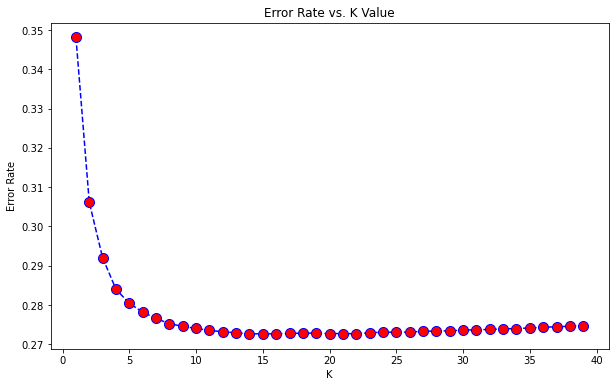

Minimum error:- 0.27263169507227397 at K = 14


In [38]:



error_rate = []
for i in range(1,40):
 knn = KNeighborsRegressor(n_neighbors=i)
 knn.fit(Xtr,y_train)
 rmse_score=cross_val_score(knn,Xtr,y_train,scoring='neg_mean_squared_error',cv=10)
 error_rate.append(np.sqrt(-rmse_score).mean())

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)